### Data Preparation and Text Encoding

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from deepctr.models import DeepFM

In [2]:
preprocessed_inter_df = pd.read_csv("./MealRec/preprocessed_user_recipe.csv")
preprocessed_inter_df.info()
preprocessed_inter_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151148 entries, 0 to 151147
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    151148 non-null  int64
 1   recipe_id  151148 non-null  int64
 2   rating     151148 non-null  int64
 3   year       151148 non-null  int64
 4   month      151148 non-null  int64
 5   day        151148 non-null  int64
 6   hour       151148 non-null  int64
dtypes: int64(7)
memory usage: 8.1 MB


,user_id,recipe_id,rating,year,month,day,hour
0,39,61727,4,2001,3,26,7
1,39,7612,5,2004,8,2,16
2,39,12009,4,2001,2,28,10
3,39,88185,5,2009,5,18,14
4,39,24445,5,2015,5,7,15


In [3]:
preprocessed_recipe_df = pd.read_csv("./MealRec/preprocessed_recipe.csv")
preprocessed_recipe_df.info()
preprocessed_recipe_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recipe_id           7280 non-null   int64  
 1   recipe_name         7280 non-null   object 
 2   review_nums         7280 non-null   int64  
 3   category            7280 non-null   object 
 4   aver_rate           7280 non-null   float64
 5   ingredients         7280 non-null   object 
 6   cooking_directions  7280 non-null   object 
 7   nutritions          7280 non-null   object 
 8   tags                7278 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 512.0+ KB


,recipe_id,recipe_name,review_nums,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,purpose flour salt baking soda baking powder g...,directions u prep n20 ncook n1 h nready n1 h 4...,u niacin u hascompletedata true u name u niaci...,north american breads easy beginner cook inexp...
1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,chopped walnuts eggs white sugar vegetable oil...,directions u whisk together flour baking soda ...,u niacin u hascompletedata true u name u niaci...,weeknight breads fruit vegetables kid friendly...
2,6725,Honey Wheat Bread I,2054,appetizer,4.766846,rapid rise yeast white sugar warm water 110 de...,directions u prep n25 ncook n35 nready n2 h 30...,u niacin u hascompletedata true u name u niaci...,healthy breads dietary low cholesterol healthy...
3,6730,Chocolate Chip Orange Zucchini Bread,503,dessert,4.674833,eggs white sugar vegetable oil vanilla extract...,directions u sift together flour baking powder...,u niacin u hascompletedata true u name u niaci...,large groups healthy breads kid friendly dieta...
4,6732,Chocolate Chip Pumpkin Bread,866,dessert,4.718112,white sugar pumpkin puree vegetable oil water ...,directions u prep n30 ncook n1 h nready n1 h 3...,u niacin u hascompletedata true u name u niaci...,breads fall winter seasonal quick breads 4 hou...


In [4]:
input_data_df = pd.merge(preprocessed_inter_df, preprocessed_recipe_df, how="left", on="recipe_id")
input_data_df.info()
input_data_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151148 entries, 0 to 151147
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151148 non-null  int64  
 1   recipe_id           151148 non-null  int64  
 2   rating              151148 non-null  int64  
 3   year                151148 non-null  int64  
 4   month               151148 non-null  int64  
 5   day                 151148 non-null  int64  
 6   hour                151148 non-null  int64  
 7   recipe_name         151148 non-null  object 
 8   review_nums         151148 non-null  int64  
 9   category            151148 non-null  object 
 10  aver_rate           151148 non-null  float64
 11  ingredients         151148 non-null  object 
 12  cooking_directions  151148 non-null  object 
 13  nutritions          151148 non-null  object 
 14  tags                151120 non-null  object 
dtypes: float64(1), int64(8), object(6)

,user_id,recipe_id,rating,year,month,day,hour,recipe_name,review_nums,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,39,61727,4,2001,3,26,7,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,vegetable oil self rising flour new mexico tom...,directions u prep n10 ncook n15 nready n25 nhe...,u niacin u hascompletedata true u name u niaci...,15 minutes less north american sauces condimen...
1,39,7612,5,2004,8,2,16,Chocolate Lovers' Favorite Cake,848,dessert,4.683846,devil food cake mix instant chocolate pudding ...,directions u prep n30 ncook n1 h nready n2 h n...,u niacin u hascompletedata false u name u niac...,large groups desserts oven cakes chocolate die...
2,39,12009,4,2001,2,28,10,Cajun Chicken Pasta,4573,main-dish,4.676716,linguine pasta boneless skinless chicken breas...,directions u prep n15 ncook n15 nready n30 nbr...,u niacin u hascompletedata false u name u niac...,30 minutes less north american main dish pasta...
3,39,88185,5,2009,5,18,14,Sopapilla Cheesecake,235,dessert,4.793919,cream cheese white sugar vanilla extract refri...,directions u prep n15 ncook n30 nready n45 npr...,u niacin u hascompletedata false u name u niac...,60 minutes less north american desserts eggs d...
4,39,24445,5,2015,5,7,15,Chewy Chocolate Chip Oatmeal Cookies,21731,dessert,4.554303,butter packed light brown sugar white sugar eg...,directions u prep n15 ncook n12 nready n55 npr...,u niacin u hascompletedata true u name u niaci...,30 minutes less large groups breakfast lunch s...


### Text Encoding

In [5]:
soup_columns = ["recipe_name", "ingredients", "cooking_directions", "nutritions", "tags"]
input_data_df[soup_columns] = input_data_df[soup_columns].astype(str)

In [6]:
input_data_df["soup"] = input_data_df.apply(lambda row: ' '.join(row[column] for column in soup_columns), axis=1)

In [7]:
input_data_df.drop(soup_columns, axis=1, inplace=True)
input_data_df.head()

,user_id,recipe_id,rating,year,month,day,hour,review_nums,category,aver_rate,soup
0,39,61727,4,2001,3,26,7,2443,main-dish,4.439774,Ten Minute Enchilada Sauce vegetable oil self ...
1,39,7612,5,2004,8,2,16,848,dessert,4.683846,Chocolate Lovers' Favorite Cake devil food cak...
2,39,12009,4,2001,2,28,10,4573,main-dish,4.676716,Cajun Chicken Pasta linguine pasta boneless sk...
3,39,88185,5,2009,5,18,14,235,dessert,4.793919,Sopapilla Cheesecake cream cheese white sugar ...
4,39,24445,5,2015,5,7,15,21731,dessert,4.554303,Chewy Chocolate Chip Oatmeal Cookies butter pa...


In [8]:
input_data_df["category"].value_counts()

main-dish    69629
dessert      46713
appetizer    34806
Name: category, dtype: int64

### Feature Preparation

In [9]:
input_data_df.columns

Index(['user_id', 'recipe_id', 'rating', 'year', 'month', 'day', 'hour',
       'review_nums', 'category', 'aver_rate', 'soup'],
      dtype='object')

In [10]:
sparse_features = ['user_id', 'recipe_id', 'year', 'month', 'day', 'hour', 'review_nums', 'category']
dense_features = ['aver_rate']
target = ['rating']
len(sparse_features), len(dense_features)

(8, 1)

In [11]:
# processing the sparse features
for feat in sparse_features:
    lbe = LabelEncoder()
    input_data_df[feat] = lbe.fit_transform(input_data_df[feat])
input_data_df.head()

,user_id,recipe_id,rating,year,month,day,hour,review_nums,category,aver_rate,soup
0,0,4262,4,1,2,25,7,1071,2,4.439774,Ten Minute Enchilada Sauce vegetable oil self ...
1,0,101,5,4,7,1,16,708,1,4.683846,Chocolate Lovers' Favorite Cake devil food cak...
2,0,1012,4,1,1,27,10,1157,2,4.676716,Cajun Chicken Pasta linguine pasta boneless sk...
3,0,4924,5,9,4,17,14,230,1,4.793919,Sopapilla Cheesecake cream cheese white sugar ...
4,0,3170,5,15,4,6,15,1223,1,4.554303,Chewy Chocolate Chip Oatmeal Cookies butter pa...


In [12]:
input_data_df["rating"].value_counts()

5    101162
4     49986
Name: rating, dtype: int64

In [13]:
mms = MinMaxScaler(feature_range=(0, 1))
input_data_df[dense_features] = mms.fit_transform(input_data_df[dense_features])

In [14]:
fixlen_feature_columns = [SparseFeat(feat, 
                                     vocabulary_size=input_data_df[feat].max() + 1, 
                                     embedding_dim=8)
                            for feat in sparse_features]

fixlen_feature_columns += [DenseFeat(feat, 1) for feat in dense_features]

In [15]:
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)
len(feature_names), feature_names

(9,
 ['user_id',
  'recipe_id',
  'year',
  'month',
  'day',
  'hour',
  'review_nums',
  'category',
  'aver_rate'])

In [16]:
train, test = train_test_split(input_data_df, test_size=0.2, random_state=2020)
train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}

In [17]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120918 entries, 73154 to 41824
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      120918 non-null  int64  
 1   recipe_id    120918 non-null  int64  
 2   rating       120918 non-null  int64  
 3   year         120918 non-null  int64  
 4   month        120918 non-null  int64  
 5   day          120918 non-null  int64  
 6   hour         120918 non-null  int64  
 7   review_nums  120918 non-null  int64  
 8   category     120918 non-null  int64  
 9   aver_rate    120918 non-null  float64
 10  soup         120918 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 11.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30230 entries, 50307 to 731
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      30230 non-null  int64  
 1   recipe_id    30230 non

(None, None)

In [18]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )

In [19]:
EPOCHS = 50
BATCH_SIZE = 256

In [20]:
len(train_model_input["recipe_id"]), len(test_model_input["recipe_id"]), type(train_model_input["recipe_id"])

(120918, 30230, pandas.core.series.Series)

In [21]:
history = model.fit(train_model_input, 
                    train[target].values, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    verbose=2, 
                    validation_split=0.2, )

Epoch 1/50
378/378 - 2s - loss: 1.3088 - mse: 1.3086 - val_loss: 0.1966 - val_mse: 0.1964
Epoch 2/50
378/378 - 1s - loss: 0.1903 - mse: 0.1900 - val_loss: 0.1971 - val_mse: 0.1967
Epoch 3/50
378/378 - 1s - loss: 0.1865 - mse: 0.1860 - val_loss: 0.1971 - val_mse: 0.1965
Epoch 4/50
378/378 - 1s - loss: 0.1835 - mse: 0.1828 - val_loss: 0.1989 - val_mse: 0.1981
Epoch 5/50
378/378 - 1s - loss: 0.1822 - mse: 0.1813 - val_loss: 0.2024 - val_mse: 0.2014
Epoch 6/50
378/378 - 1s - loss: 0.1795 - mse: 0.1783 - val_loss: 0.2042 - val_mse: 0.2029
Epoch 7/50
378/378 - 1s - loss: 0.1757 - mse: 0.1744 - val_loss: 0.2054 - val_mse: 0.2039
Epoch 8/50
378/378 - 1s - loss: 0.1732 - mse: 0.1715 - val_loss: 0.2084 - val_mse: 0.2067
Epoch 9/50
378/378 - 1s - loss: 0.1701 - mse: 0.1683 - val_loss: 0.2128 - val_mse: 0.2108
Epoch 10/50
378/378 - 1s - loss: 0.1658 - mse: 0.1638 - val_loss: 0.2141 - val_mse: 0.2119
Epoch 11/50
378/378 - 1s - loss: 0.1623 - mse: 0.1600 - val_loss: 0.2204 - val_mse: 0.2179
Epoch 12

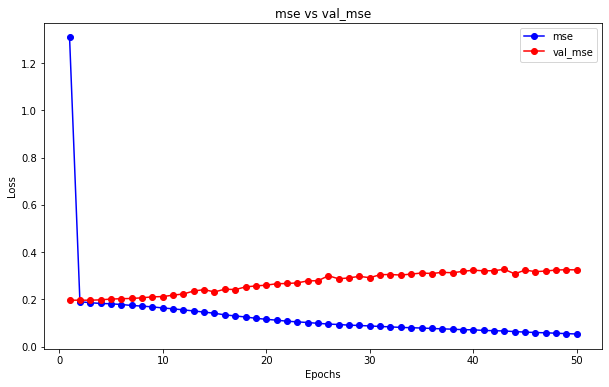

In [22]:
import matplotlib.pyplot as plt
# Extract loss and validation loss values
def plot_history(history, train_metric: str, val_metric: str):
    history_dict = history.history

    loss = history_dict[train_metric]
    val_loss = history_dict[val_metric]
    # Create an array with epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label=train_metric)
    plt.plot(epochs, val_loss, 'ro-', label=val_metric)
    plt.title(f'{train_metric} vs {val_metric}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history, "mse", "val_mse")

In [23]:
pred_ans = model.predict(test_model_input, batch_size=256)
print("test MSE", round(mean_squared_error(test[target].values, pred_ans), 4))

test MSE 0.3246


### Manual Evaluation

In [24]:
ground_truth = test[target].values
prediction = pred_ans
type(ground_truth), type(prediction)

(numpy.ndarray, numpy.ndarray)

In [25]:
import numpy as np
indices = np.random.choice(30230, size=10, replace=False)
sample_array1 = ground_truth[indices]
sample_array2 = prediction[indices]

In [27]:
df = pd.DataFrame({'truth': sample_array1.flatten(), 'pred': sample_array2.flatten()})
df['diff'] = np.abs(df['truth'] - df['pred'])
df


,truth,pred,diff
0,5,4.186517,0.813483
1,5,4.611650,0.388350
2,5,4.494949,0.505051
3,4,4.728626,0.728626
4,5,5.075934,0.075934
5,4,4.581679,0.581679
6,5,4.959891,0.040109
7,4,5.178048,1.178048
8,5,4.927098,0.072902
9,4,4.983259,0.983259
